In [5]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
def generate_price(sqft, bedrooms, bathrooms, offers, brick, neighborhood):
    base_price = 100000
    price = base_price + (sqft * 100) + (bedrooms * 10000) + (bathrooms * 5000) + (offers * 2000)
    
    if brick:
        price += 50000  # Increase pricefor brick houses
    if neighborhood == "South":
        price += 100000  # Increase price for South neighborhood

    # Adding some randomness
    price += random.uniform(-50000, 50000)
    return round(price, 2)

def generate_data():
    data = []
    neighborhoods = [ "East", "West", "South", "North"]
    for i in range(1, 201):
        sqft = random.randint(800, 4000)
        
        if 800 <= sqft <= 1600:
            bedrooms = random.randint(1,3)
            bathrooms = random.randint(1, bedrooms)
        if 1600 <= sqft <= 2500:
            bedrooms = random.randint(2,4)
            bathrooms = random.randint(2, bedrooms)
        if 2600 <= sqft <= 4000:
            bedrooms = random.randint(2,5)
            bathrooms = random.randint(2, 4)
        
        offers = random.randint(0, 5)
        brick = random.choice([0, 1])
        neighborhood = random.choice(neighborhoods)
        
        price = generate_price(sqft, bedrooms, bathrooms, offers, brick, neighborhood)
        
        entry = {
            "property": f"{i}",
            "price": price,
            "sqft": sqft,
            "bedrooms": bedrooms,
            "bathrooms": bathrooms,
            "offers": offers,
            "has_brick": brick,
            "neighborhood": neighborhood
        }
        data.append(entry)
    return data

# Generate the data
data = generate_data()

# Specify the CSV file name
csv_file = "real_estate_data.csv"

# Write data to CSV
with open(csv_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=["property", "price", "sqft", "bedrooms", "bathrooms", "offers", "has_brick", "neighborhood"])
    writer.writeheader()
    writer.writerows(data)

print(f"Data generated and saved to {csv_file}")

Data generated and saved to real_estate_data.csv


In [8]:
df = pd.read_csv("real_estate_data.csv")
df.head(5)

,property,price,sqft,bedrooms,bathrooms,offers,has_brick,neighborhood
0,1,499330.38,2170,2,2,2,1,South
1,2,463068.66,2846,5,4,4,1,West
2,3,319615.42,819,2,2,4,0,South
3,4,167108.19,913,1,1,3,0,East
4,5,460959.03,2790,5,2,5,1,North


In [9]:
features = ['sqft', 'bedrooms', 'bathrooms']
X = df[features]
y = df['price']
model = LinearRegression()
model.fit(X, y)

#y=a+b[0]x[0]+b[1]x[1]+b[2]x[2].........b[n]x[n]

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [   96.42445127 12812.71673106  9716.06672743]
Intercept: 141433.2707237628


In [10]:
# Step 3: Predict the price for given values
sqft = 2000
bedrooms = 3
bathrooms = random.randint(1, bedrooms)  # Bathrooms cannot be greater than bedrooms
neighborhood = "South"

# Encode the 'South' neighborhood influence
neighborhood_influence = 100000 if neighborhood == "South" else 0

# Calculate the predicted price
predicted_price = model.intercept_ + \
                  model.coef_[0] * sqft + \
                  model.coef_[1] * bedrooms + \
                  model.coef_[2] * bathrooms + \
                  neighborhood_influence

print(f"Predicted price for a home with {sqft} SqFt, {bedrooms} bedrooms, {bathrooms} bathrooms, in the '{neighborhood}' neighborhood: ${predicted_price:.2f}")


Predicted price for a home with 2000 SqFt, 3 bedrooms, 3 bathrooms, in the 'South' neighborhood: $501868.52


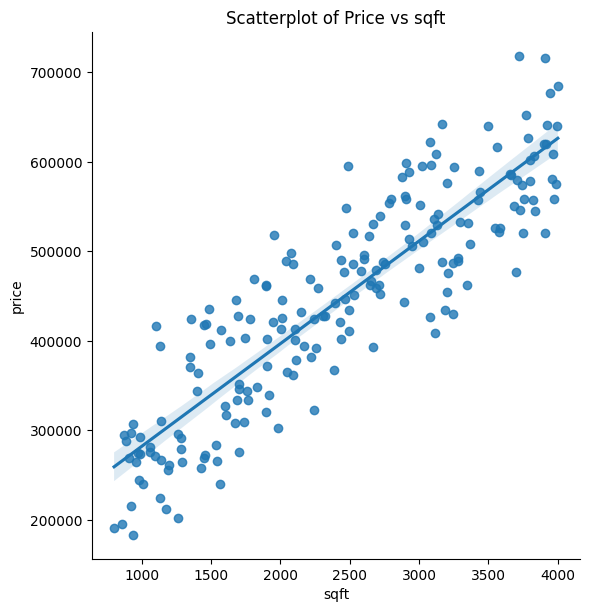

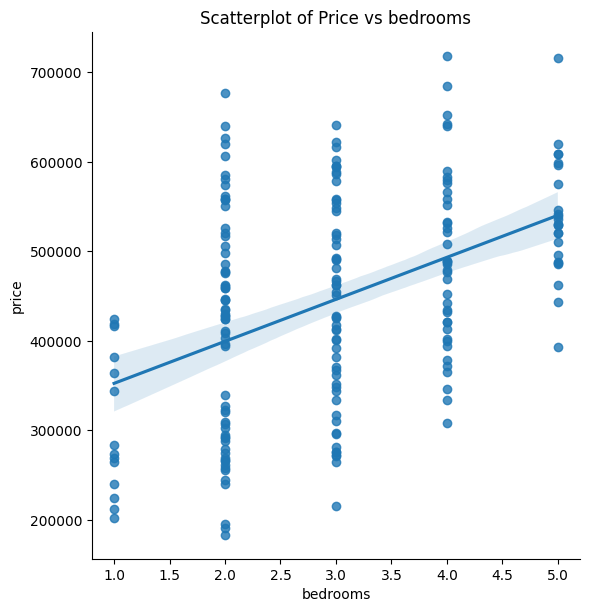

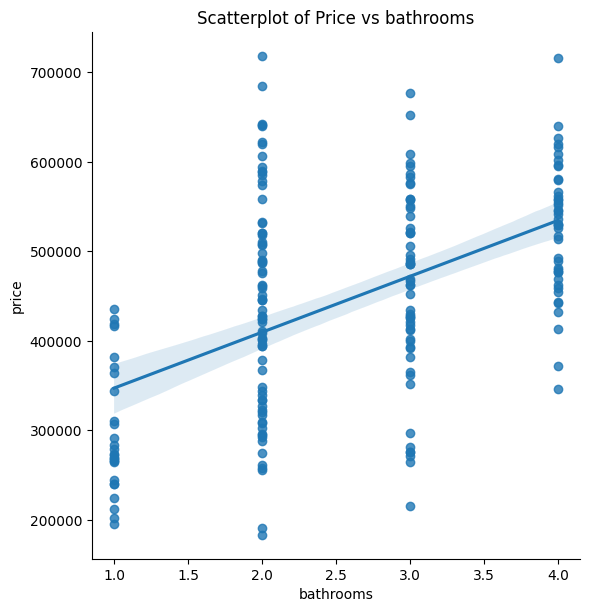

In [15]:
import seaborn as sns
data = df
# Plot scatterplots of dependent variable against each independent variable separately
for feature in features:
    sns.lmplot(x=feature, y='price', data=data, height=6)
    plt.title('Scatterplot of Price vs {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.show()